# Profile del código serial

Para esto, utilizamos el módulo cProfile que esta incluida en la libreria estandar de python.

Desde la linea de comando corremos:

    python3 -m cProfile -o lab/i_j main.py
    
Donde *i* es la cantidad de aceptores y *j* es la cantidad de bombardeos. Realizamos varias corridas en las que se variaba unicamente la cantidad de bombardeos, empezando en 1000 hasta 12000 avanzando de a 1000.

In [1]:
import pstats
import sys
sys.path.append('../')

import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
%matplotlib inline

import ten

## Ejemplo de profile

In [2]:
p = pstats.Stats('data/profile/25_5000')
p.sort_stats('cumulative').print_stats(20)

Tue Nov  3 11:55:15 2015    data/profile/25_5000

         11461237 function calls (11457925 primitive calls) in 163.966 seconds

   Ordered by: cumulative time
   List reduced from 1015 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    131/1    0.006    0.000  163.966  163.966 {built-in method exec}
        1    0.002    0.002  163.966  163.966 main.py:3(<module>)
       26    5.503    0.212  163.742    6.298 /home/fnbellomo/Desktop/Proyectos/ten/src/exciton.py:108(quenching)
  1531940   52.250    0.000   74.084    0.000 /home/fnbellomo/Desktop/Proyectos/ten/src/utils.py:18(generate_random_points_in_sphere)
  1157445   13.034    0.000   64.591    0.000 /home/fnbellomo/Desktop/Proyectos/ten/src/exciton.py:62(walk)
  1268180   33.753    0.000   63.666    0.000 /home/fnbellomo/Desktop/Proyectos/ten/src/exciton.py:83(p_transfer)
  2541010   35.955    0.000   35.957    0.000 {built-in method sum}
   130000    0.300    0.000   23.924 

## Tiempos

### Variando las exitaciones

En este análisis, unicamente se varia la cantidad de excitaciones.

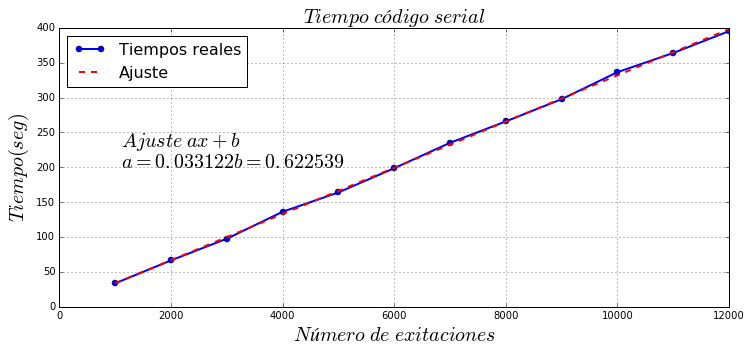

In [3]:
total_time = []
x = np.array([i for i in range(1000, 13000, 1000)])

# Función con la cual voy a realizar el ajuste
def func(x, a, b):
    return a*x + b

# Extraigo los tiempos
for i in x:
    profile = 'data/profile/25_%i' %i
    p = pstats.Stats(profile)
    total_time.append(p.total_tt)
    
popt, pcov = curve_fit(func, x, total_time)
    
plt.figure(figsize=(12,5))
plt.plot(x, total_time, '-o', linewidth=2, label="Tiempos reales")
plt.plot(x, func(x, popt[0], popt[1]), 'r--', linewidth=2, label="Ajuste")
plt.xlabel(r'$Número\; de\; exitaciones$', fontsize=20)
plt.ylabel(r'$Tiempo(seg)$', fontsize=20)
plt.title(r'$Tiempo\; código\; serial$', fontsize=20)
plt.text(1100, 230, r'$Ajuste\; ax+ b$', fontsize=20)
plt.text(1100, 200, r'$a = %f b = %f$' %(popt[0], popt[1]), fontsize=20)
plt.legend(loc='best', fontsize=16)
plt.grid(True)

### Variando $\epsilon$ y $D$

Ahora, dejamos la cantidad de exitaciones fija en 5000 y variamos $\epsilon$ y $D$. Variamos estos parámetros debido a la medición de estos es complicada, con lo cual los valores obtenidos tiene errores grandes con lo cual ambos parámetros pueden varian demasiado.

Los datos que vamos a graficar son del dopado con TPP, pero esto fue totalmente asarozo. Tenemos que tener en cuenta que estas simulaciones fueron realizadas implimentado la versión paralela con 2 cores, pero en este análisis no nos modifica debido a que nuestro interes es ver si existe o no una dependencia entere el tiempo de la corrida y la variación de estos parámetros.

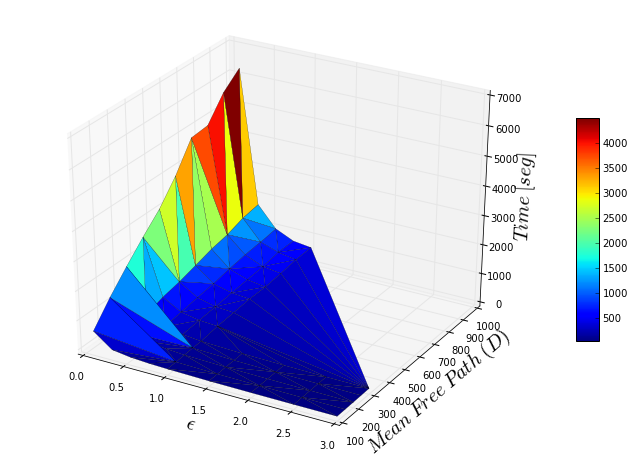

In [4]:
# TPP
aceptor_TPP = [0, 40, 100, 200, 400, 1000]
data = ten.post.extrac4dir('data/TPP/', aceptor_TPP)

# 3D plot
x = data[:,0]
y = data[:,1]
z = data[:,2]

fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(y, x, z, cmap=cm.jet, linewidth=0.2)
ax.set_ylabel(r'$Mean\; Free\; Path\; (D)$', fontsize=20)
ax.set_xlabel(r'$\epsilon$', fontsize=20)
ax.set_zlabel(r'$Time\; [seg]$', fontsize=20)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

In [5]:
#Este css esta basado en el de @LorenaABarba y su grupo
from IPython.core.display import HTML
css_file = 'css/personal.css'
HTML(open(css_file, "r").read())

##### Licencia
El código esta licenciado bajo MIT.

La documentación bajo:

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">TEN</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Laboratorio de Microscopia Óptica Avanzada - UNRC</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.<br />Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/pewen/ten" rel="dct:source">https://github.com/pewen/ten</a>